In [28]:
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/irlfdyh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem.porter import PorterStemmer

pst = PorterStemmer()

words_to_stem = ["writes", "writing", "written", "wrote"]

for words in words_to_stem:
    print(words + " : " + pst.stem(words))

In [30]:
# word lemmatize text
from nltk.stem.wordnet import WordNetLemmatizer

words_to_lem = ["writes", "writing", "written", "wrote"]

word_lem = WordNetLemmatizer()

for words in words_to_lem:
     print(words + " : " + word_lem.lemmatize(words, 'v'))


writes : write
writing : write
written : write
wrote : write


In [31]:
# entity masking

import re

email = re.compile('\w+@\w+\.[a-z]{3}')
text = "To email Guido, try guido@python.org or the older address guido@google.com"
email.findall(text)

['guido@python.org', 'guido@google.com']

In [32]:
# entity masking

text_mask = email.sub('_email_', text)

text_mask

'To email Guido, try _email_ or the older address _email_'

In [33]:
# vector

from sklearn.feature_extraction.text import CountVectorizer

text = ["The quick brown fox jumped over the lazy dog."]

vectorizer = CountVectorizer()

vectorizer.fit(text)

vectorizer.vocabulary_

{'the': 7,
 'quick': 6,
 'brown': 0,
 'fox': 2,
 'jumped': 3,
 'over': 5,
 'lazy': 4,
 'dog': 1}

In [34]:
vector = vectorizer.transform(text)

print(vector.shape)
print(type(vector))
print(vector.toarray())

(1, 8)
<class 'scipy.sparse._csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


In [35]:
vectorizer2 = CountVectorizer()
vector2 = vectorizer2.fit_transform(text)

print(vector.shape)
print(type(vector))
print(vector.toarray())
print(vectorizer2.vocabulary_)

(1, 8)
<class 'scipy.sparse._csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]
{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}


Text(0, 0.5, 'Number of Spam Texts')

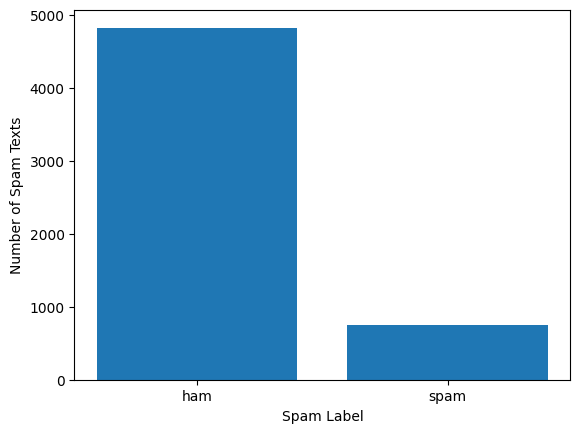

In [36]:
import pandas as pd

data = pd.read_csv('dataset/spam.csv', encoding='latin-1')
data.columns = ['label', 'text', 't1', 't2', 't3']

import matplotlib.pyplot as plt

spam_count = data.groupby('label').count()
plt.bar(spam_count.index.values, spam_count['text'])
plt.xlabel('Spam Label')
plt.ylabel('Number of Spam Texts')

In [37]:
# Feature Classification & Manual Classification

s = ' '.join(data.text)

str_list = s.lower().split()
unique_words = set(str_list)

dictwords = dict()
for words in unique_words:
     dictwords[words] = [str_list.count(words)]
     
dataham = data[data.label == "ham"]
dataspam = data[data.label == "spam"]

sham = ' '.join(dataham.text)
sspam = ' '.join(dataspam.text)
sham_list = sham.lower().split()
sspam_list = sspam.lower().split()

for words in unique_words:
    iham = sham_list.count(words)
    ispam = sspam_list.count(words)
    dictwords[words].append(iham)
    dictwords[words].append(ispam)
    dictwords[words].append(ispam-iham)
    
sortfreq = sorted(dictwords.items(), key=lambda x: x[1][3], reverse=True)
dictfreq = sortfreq[:100]
len(dictfreq)
dictfreq

[('free', [228, 48, 180, 132]),
 ('call', [557, 215, 342, 127]),
 ('txt', [149, 13, 136, 123]),
 ('claim', [106, 0, 106, 106]),
 ('mobile', [124, 15, 109, 94]),
 ('&', [107, 9, 98, 89]),
 ('reply', [127, 26, 101, 75]),
 ('now!', [75, 5, 70, 65]),
 ('won', [64, 0, 64, 64]),
 ('nokia', [67, 3, 64, 61]),
 ('stop', [118, 29, 89, 60]),
 ('prize', [58, 0, 58, 58]),
 ('text', [175, 63, 112, 49]),
 ('win', [68, 10, 58, 48]),
 ('cash', [65, 9, 56, 47]),
 ('contact', [68, 12, 56, 44]),
 ('service', [52, 4, 48, 44]),
 ('urgent!', [42, 0, 42, 42]),
 ('tone', [40, 0, 40, 40]),
 ('awarded', [38, 0, 38, 38]),
 ('latest', [37, 1, 36, 35]),
 ('å£1000', [33, 0, 33, 33]),
 ('per', [56, 12, 44, 32]),
 ('draw', [42, 5, 37, 32]),
 ('customer', [49, 9, 40, 31]),
 ('150ppm', [30, 0, 30, 30]),
 ('guaranteed', [29, 0, 29, 29]),
 ('chat', [49, 10, 39, 29]),
 ('receive', [37, 4, 33, 29]),
 ('our', [142, 57, 85, 28]),
 ('shows', [35, 4, 31, 27]),
 ('entry', [26, 0, 26, 26]),
 ('video', [30, 2, 28, 26]),
 ('po', [3

In [38]:
# feature extraction & Machine Learning

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 1), tokenizer=token.tokenize)
text_counts = cv.fit_transform(data['text'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text_counts, data['label'], test_size=0.1, random_state=1)

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(x_train, y_train)
predicted = clf.predict(x_test)
print("MultinominalNB Accuracy: ", metrics.accuracy_score(y_test, predicted))

MultinominalNB Accuracy:  0.978494623655914


/home/irlfdyh/Documents/UNIVERSITY/STUDY/S7/TUGAS-PROYEK-DATA-MINING/playground/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
